In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data = pd.read_csv('C:/Users/prem/Downloads/IPL Dataset/IPL Dataset and Code/IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('C:/Users/prem/Downloads/IPL Dataset/IPL Dataset and Code/IPL Ball-by-Ball 2008-2020.csv')

In [4]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
#checking null values
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [10]:
#no. of rows and column in dataset (R,C)
match_data.shape

(816, 17)

In [61]:
ball_data.shape

(193468, 18)

In [62]:
print('Total Matches Played so far:',match_data.shape[0])
print('\n Cities in which match played:',match_data['city'].unique())
print('\n Teams:',match_data['team1'].unique())

Total Matches Played so far: 816

 Cities in which match played: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [3]:
#extracting year from 'date' column and adding new column "season" in match_data
match_data['season'] =pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [4]:
match_per_season = match_data.groupby(['season'])['id'].count().reset_index().rename(columns ={'id':'matches'})
match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total no. of matches played in each season')

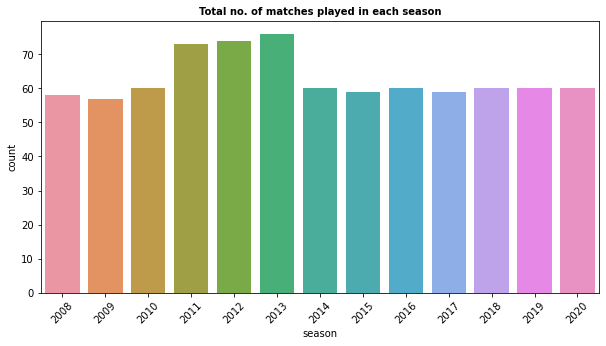

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(match_data['season'])
plt.xticks(rotation = 45,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Total no. of matches played in each season', fontsize=10, fontweight = 'bold')

In [5]:
season_data = match_data[['id','season']].merge(ball_data, left_on = 'id',right_on='id',how='left').drop('id',axis=1)
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


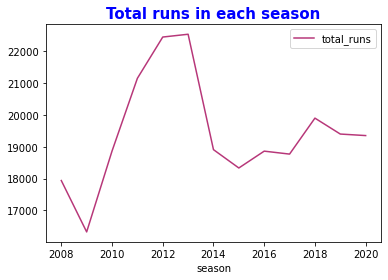

In [6]:
#total runs scoring each season
season = season_data.groupby(['season'])['total_runs'].sum().reset_index()
p = season.set_index('season')
ax=plt.axes()
ax.set(facecolor = 'white')
sns.lineplot(data=p,palette='magma')
plt.title('Total runs in each season', fontsize= 15,color ='blue',fontweight='bold')
plt.show()

In [7]:
runs= p.groupby(['season'])['total_runs'].sum().reset_index()
runs

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [23]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis = 1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season

,season,matches,total_runs,Runs scored per match
0,2008,58,17937,309.258621
1,2009,57,16320,286.315789
2,2010,60,18864,314.400000
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22541,296.592105
6,2014,60,18909,315.150000
7,2015,59,18332,310.711864
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


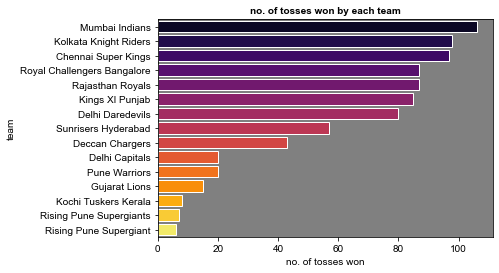

In [8]:
toss = match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc={'figure.figsize': (15,10)},style = 'darkgrid')
ax.set_title('no. of tosses won by each team', fontsize=10,fontweight='bold')
sns.barplot(y=toss.index, x= toss,orient='h',palette='inferno',saturation=1)
plt.xlabel('no. of tosses won')
plt.ylabel('team')
plt.show()

In [9]:
toss = match_data['toss_winner'].value_counts().reset_index().rename(columns ={'toss_winner':'No. of toss won'}).rename(columns ={'index':'Team'})
toss

,Team,No. of toss won
0,Mumbai Indians,106
1,Kolkata Knight Riders,98
2,Chennai Super Kings,97
3,Royal Challengers Bangalore,87
4,Rajasthan Royals,87
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,57
8,Deccan Chargers,43
9,Delhi Capitals,20


Text(0.5, 1.0, 'Toss decision across seasons')

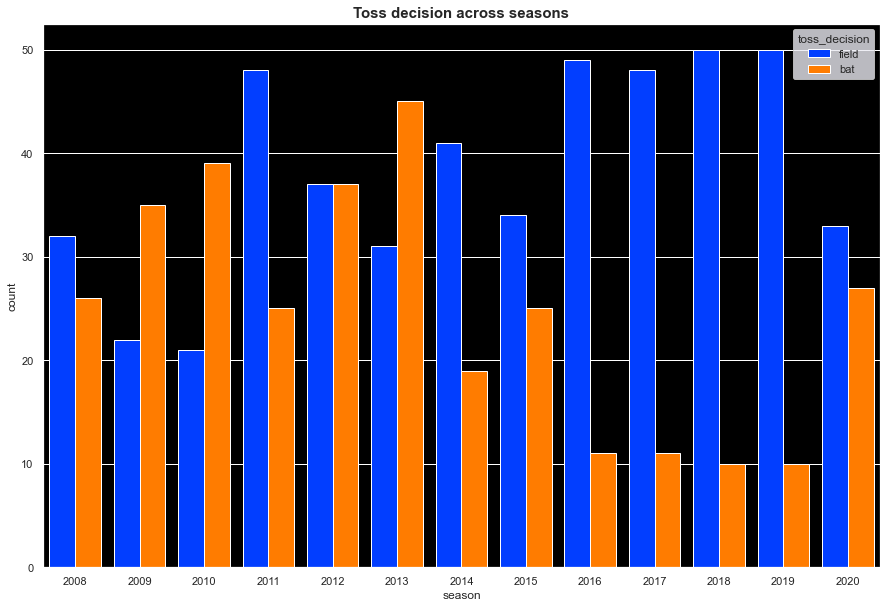

In [10]:
ax = plt.axes()
ax.set(facecolor ="black")
sns.countplot(data =match_data,x='season',hue = 'toss_decision',palette = 'bright',saturation=1)
plt.title('Toss decision across seasons',fontsize=15,fontweight='bold')

In [73]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [92]:
#which stadium is best for winning by wickets
match_data.venue[match_data.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

In [90]:
match_data.venue[match_data.result=='wickets'].mode()

0    Eden Gardens
dtype: object

In [88]:
#most player of the match
match_data.player_of_match.value_counts()

AB de Villiers     23
CH Gayle           22
RG Sharma          18
MS Dhoni           17
DA Warner          17
                   ..
CR Brathwaite       1
M Kartik            1
EJG Morgan          1
AA Jhunjhunwala     1
RE Levi             1
Name: player_of_match, Length: 233, dtype: int64

In [116]:
#best stadium to win match when a team win toss
match_data.venue[match_data.toss_winner=="Chennai Super Kings"][match_data.winner=="Chennai Super Kings"].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

In [108]:
#total matches won by teams till now
match_data.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [13]:
match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [12]:
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
dtype: object

C:\Users\prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


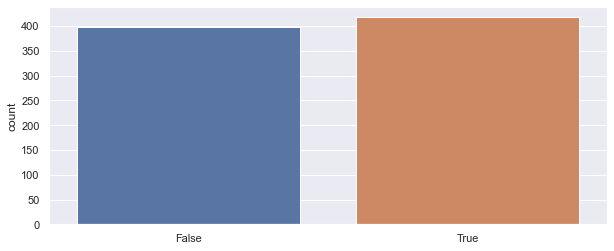

In [35]:
toss = match_data['toss_winner']==match_data['winner']
plt.figure(figsize=(10,4))
sns.countplot(toss)
plt.show()

In [26]:
toss = match_data['toss_winner']==match_data['winner'].sum()
toss

TypeError: can only concatenate str (not "int") to str

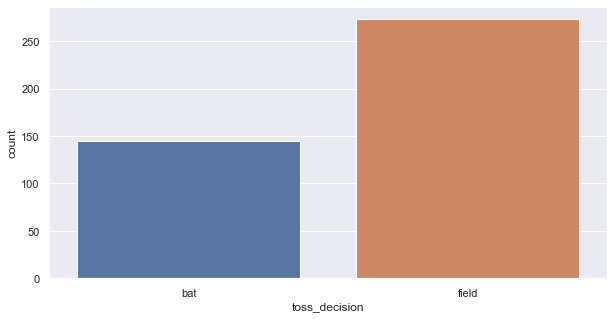

In [34]:
#choosing fielding helps more in winning a match
plt.figure(figsize=(10,5))
sns.countplot(match_data.toss_decision[match_data.toss_winner==match_data.winner])
plt.show()

In [41]:
#player stats
player = (ball_data['batsman']=='V Kohli')
df_kohli = ball_data[player]
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


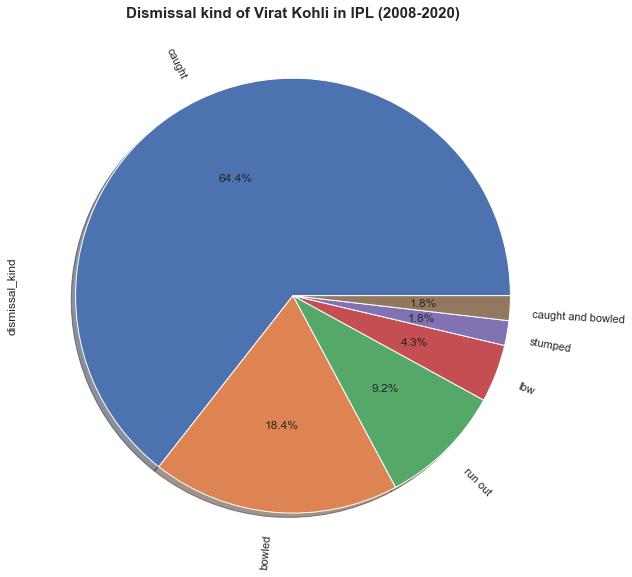

In [47]:
df_kohli['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels= True)
plt.title('Dismissal kind of Virat Kohli in IPL (2008-2020)',fontsize=15,fontweight='bold')
plt.show()

In [52]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [59]:
print("Runs scored from 1's =",count(df_kohli,1))
print("Runs scored from 2's =",count(df_kohli,2))
print("Runs scored from 3's =",count(df_kohli,3))
print("Runs scored from 4's =",count(df_kohli,4))
print("Runs scored from 6's =",count(df_kohli,6))

Runs scored from 1's = 1919
Runs scored from 2's = 692
Runs scored from 3's = 39
Runs scored from 4's = 2016
Runs scored from 6's = 1212


In [64]:
#winning by highest run margin
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [78]:
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns =['Batsman','Runs']
y = runs.sort_values(by = 'Runs', ascending=False).head(10)
y

,Batsman,Runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217
